In [1]:
from itertools import chain
from random import random

import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm

from society.action import Action
from society.agent import Agent
from society.simulations.adaptive import AdaptiveSimulation
from society.agents.constant import AllC, AllD
from society.agents.qlearning import TabularQLearner, DoubleTabularQLearner
from society.agents.random import Random
from society.agents.tft import TitForTat
from society.visualisation.network import *

plt.rcParams["figure.figsize"] = (12, 5)

In [2]:
def generate_population(population):
    agents = [TitForTat() for _ in range(population // 10)] + [
        DoubleTabularQLearner(
            lookback=2, epsilon=0.1, learning_rate=0.05, discount_factor=0.99
        )
        for _ in range(9 * population // 10)
    ]

    G = nx.complete_graph(population)

    weights_matrix = np.zeros((population, population))
    for u, v, d in G.edges(data=True):
        weights_matrix[u, v] = weights_matrix[v, u] = 1
        try:
            d["weight"] = weights_matrix[u, v]
        except:
            d["weight"] = 0

    return agents, weights_matrix, G

In [3]:
# _, _, G = generate_population(32)

# nx.draw(G, pos=nx.spring_layout(G), font_color="white", with_labels=True)

In [4]:
def compute_policies(agents):
    policies = [
        agent._q_table.argmax(axis=-1) if hasattr(agent, "_q_table") else None
        for agent in agents
    ]

    return [
        "".join(
            [
                ("C", "D")[policy[i, j]]
                for i in range(4)
                for j in range(4)
                # for k in range(4)
            ]
        )
        if policy is not None
        else "OTHER"
        for policy in policies
    ]


def calculate_cooperativeness(history):
    count = history.count(Action.COOPERATE)

    return count / len(history)

In [5]:
PAYOFF_LABELS = ["(C, C)", "(C, D)", "(D, C)", "(D, D)"]
# PAYOFF_LABELS = ["R", "S", "T", "P"]

Run 1:   0%|          | 0/6000 [00:00<?, ?it/s]

BEST AGENT (0): 37012 (0.9394273996371953, OTHER)
WORST AGENT (55): 27000 (0.5490434994516876, DCDCCCCCCCCCCCCC)


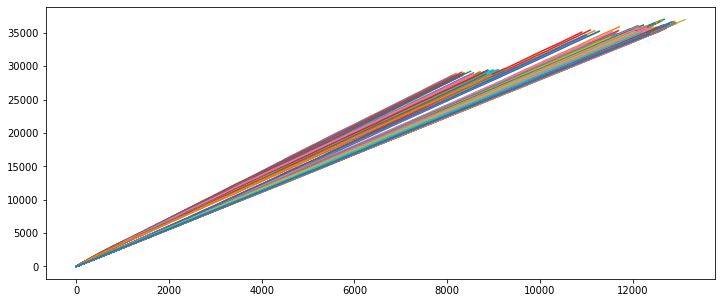

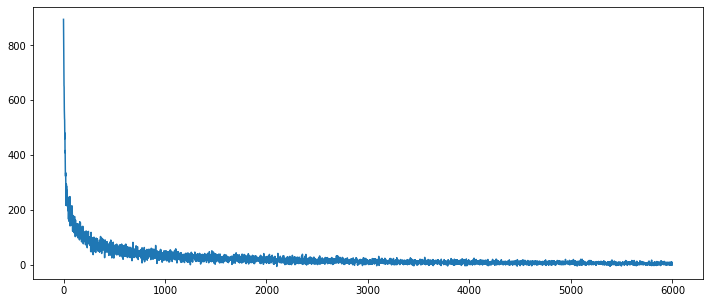

In [6]:
POPULATION = (512,)
ROUNDS = 6_000

run_rewards = []
run_cumulative_rewards = []
run_reward_histories = []
run_policies = []

for run in range(1):
    # Generate a new population
    agents, weights_matrix, G = generate_population(*POPULATION)

    # Run a number of rounds
    sim = AdaptiveSimulation(agents, weights_matrix)

    # Run the simulation
    sim.reset()
    for i in tqdm(range(ROUNDS), desc=f"Run {run + 1}"):
        sim.play_round(train=True)

    # Store results
    run_rewards.append(sim.rewards)
    # run_action_histories.append(sim.action_histories)
    run_reward_histories.append(sim.reward_histories)
    run_policies.append(compute_policies(agents))

    # Output statistics for the best and worst agents
    cumulative_rewards = [
        (i, sum(history)) for i, history in enumerate(sim.reward_histories)
    ]
    cumulative_rewards.sort(key=lambda x: x[1], reverse=True)

    tqdm.write(
        f"BEST AGENT ({cumulative_rewards[0][0]}): {cumulative_rewards[0][1]} ({calculate_cooperativeness(list(chain(*sim.action_histories[cumulative_rewards[0][0]])))}, {run_policies[-1][cumulative_rewards[0][0]]})"
    )
    tqdm.write(
        f"WORST AGENT ({cumulative_rewards[-1][0]}): {cumulative_rewards[-1][1]} ({calculate_cooperativeness(list(chain(*sim.action_histories[cumulative_rewards[-1][0]])))}, {run_policies[-1][cumulative_rewards[-1][0]]})"
    )

    for rh in sim.reward_histories:
        plt.plot(np.cumsum(rh))

    plt.show()

    plt.plot(sim.differences)
    plt.show()

In [7]:
# plot_matrix(sim.produce_weight_matrix(), digits=2, figsize=(60, 36))

In [8]:
# plot_matrix(sim.frequencies, digits=0, figsize=(60, 36))

In [9]:
sim.calculate_weights()

array([[0.05      , 0.05      , 1.        , ..., 1.        , 0.7744    ,
        1.        ],
       [0.05      , 0.05      , 1.        , ..., 1.        , 0.5463138 ,
        1.        ],
       [1.        , 1.        , 0.05      , ..., 1.        , 0.20661157,
        0.8622449 ],
       ...,
       [1.        , 1.        , 1.        , ..., 0.05      , 0.05      ,
        1.        ],
       [0.7744    , 0.5463138 , 0.20661157, ..., 0.05      , 0.05      ,
        0.79012346],
       [1.        , 1.        , 0.8622449 , ..., 1.        , 0.79012346,
        0.05      ]])

In [10]:
sim.action_histories[0][2]

[<Action.COOPERATE: 0>,
 <Action.COOPERATE: 0>,
 <Action.COOPERATE: 0>,
 <Action.COOPERATE: 0>,
 <Action.COOPERATE: 0>,
 <Action.COOPERATE: 0>,
 <Action.COOPERATE: 0>,
 <Action.COOPERATE: 0>,
 <Action.COOPERATE: 0>,
 <Action.COOPERATE: 0>,
 <Action.COOPERATE: 0>,
 <Action.COOPERATE: 0>,
 <Action.COOPERATE: 0>,
 <Action.COOPERATE: 0>,
 <Action.COOPERATE: 0>,
 <Action.COOPERATE: 0>,
 <Action.COOPERATE: 0>,
 <Action.COOPERATE: 0>,
 <Action.COOPERATE: 0>,
 <Action.COOPERATE: 0>,
 <Action.COOPERATE: 0>,
 <Action.COOPERATE: 0>,
 <Action.COOPERATE: 0>,
 <Action.COOPERATE: 0>,
 <Action.COOPERATE: 0>,
 <Action.COOPERATE: 0>,
 <Action.COOPERATE: 0>,
 <Action.COOPERATE: 0>,
 <Action.COOPERATE: 0>,
 <Action.COOPERATE: 0>,
 <Action.COOPERATE: 0>,
 <Action.COOPERATE: 0>,
 <Action.COOPERATE: 0>,
 <Action.COOPERATE: 0>,
 <Action.COOPERATE: 0>,
 <Action.COOPERATE: 0>,
 <Action.COOPERATE: 0>,
 <Action.COOPERATE: 0>,
 <Action.COOPERATE: 0>,
 <Action.COOPERATE: 0>,
 <Action.COOPERATE: 0>,
 <Action.COOPERA

In [11]:
cumulative_rewards[0][0]

0

In [12]:
if hasattr(agents[cumulative_rewards[0][0]], "_q_table"):
    print(agents[cumulative_rewards[0][0]]._q_table)

In [13]:
agents[cumulative_rewards[4][0]].play_move(
    [Action.COOPERATE, Action.COOPERATE], [Action.COOPERATE, Action.COOPERATE]
)

<Action.COOPERATE: 0>

In [15]:
if hasattr(agents[1], "_q_table"):
    print(agents[1]._q_table)

In [ ]:
# from datetime import datetime
# import pickle

# with open(f"results - {datetime.isoformat(datetime.now()).replace(':', '-')}.pickle", "wb") as f:
#     pickle.dump({
#         "rewards": run_rewards,
#         "cumulative_rewards": run_cumulative_rewards,
#         # "action_histories": run_action_histories,
#         "reward_histories": run_reward_histories,
#         "policies": run_policies,
#     }, f)

In [16]:
cumulative_reward_policy_ranks = {}
cumulative_reward_policies = {}

for policies, reward_histories in zip(run_policies, run_reward_histories):
    cumulative_rewards = [
        (i, sum(history)) for i, history in enumerate(reward_histories)
    ]
    cumulative_rewards.sort(key=lambda x: x[1], reverse=True)

    for rank, (i, cumulative_reward) in enumerate(cumulative_rewards):
        policy = policies[i]

        if policy not in cumulative_reward_policy_ranks:
            cumulative_reward_policy_ranks[policy] = []
            cumulative_reward_policies[policy] = []

        cumulative_reward_policy_ranks[policy].append(rank + 1)
        cumulative_reward_policies[policy].append(cumulative_reward)

mean_cumulative_reward_policy_ranks = {
    policy: np.mean(ranks) for policy, ranks in cumulative_reward_policy_ranks.items()
}
mean_cumulative_reward_policies = {
    policy: np.mean(rewards) for policy, rewards in cumulative_reward_policies.items()
}

In [17]:
for policy in sorted(
    mean_cumulative_reward_policy_ranks,
    key=lambda x: mean_cumulative_reward_policy_ranks[x],
):
    print(f"{mean_cumulative_reward_policy_ranks[policy]:<24} {policy}")

49.0                     CCCDCCCCCCCCDCCC
63.0                     CCCCCCCCCCDDCCCC
70.0                     CCCCCCCCDCCDCCCC
73.80392156862744        OTHER
86.0                     CCCDCCCDCCCCDCCC
89.0                     CDCCCCCCCCDCCCCC
104.0                    CCDDCCCCCCCCCCCC
110.0                    CCCCCCCCCCCCCCDD
113.0                    CCCCCCCDCCCCDCCD
115.0                    CCDCCCCCCCCDCCCC
116.0                    CCCCCCCDDCCCCCCC
122.0                    CCDCCCCDCCCCCCCD
126.0                    CCCDCCCCCCDCCCCC
134.57142857142858       CCCCCCCCCCCCCCDC
140.0                    CCCCCDCCCCCDCCCC
145.88888888888889       CCCCCCCDCCCCCCCC
148.0                    CDCCCCCCCCCCCDCC
149.0                    CCDDCDCDCCCCCCCC
165.0                    CCCCDCCDCCCCDCCC
165.2                    CCCCCCCCCCCCCDCC
172.44444444444446       CCCCCCDCCCCCCCCC
182.5                    CCCCCCCCDCCCCCCC
186.0                    CCCCCDCCCCCCCCCC
188.0                    CDDCCCCCCCCCCCCC
199

In [18]:
for policy in sorted(
    mean_cumulative_reward_policies,
    key=lambda x: mean_cumulative_reward_policies[x],
    reverse=True,
):
    print(f"{mean_cumulative_reward_policies[policy]:<24} {policy}")

36215.0                  CCCDCCCCCCCCDCCC
36194.490196078434       OTHER
36109.0                  CCCCCCCCCCDDCCCC
36064.0                  CCCCCCCCDCCDCCCC
35992.0                  CCCDCCCDCCCCDCCC
35988.0                  CDCCCCCCCCDCCCCC
35928.0                  CCDDCCCCCCCCCCCC
35915.0                  CCCCCCCCCCCCCCDD
35909.0                  CCCCCCCDCCCCDCCD
35887.0                  CCDCCCCCCCCDCCCC
35882.0                  CCCCCCCDDCCCCCCC
35877.71428571428        CCCCCCCCCCCCCCDC
35865.0                  CCDCCCCDCCCCCCCD
35830.0                  CCCDCCCCCCDCCCCC
35801.555555555555       CCCCCCCDCCCCCCCC
35763.0                  CCCCCDCCCCCDCCCC
35733.0                  CDCCCCCCCCCCCDCC
35732.0                  CCDDCDCDCCCCCCCC
35705.4                  CCCCCCCCCCCCCDCC
35664.0                  CCCCDCCDCCCCDCCC
35659.333333333336       CCCCCDCCCCCCCCCC
35650.11111111111        CCCCCCDCCCCCCCCC
35631.5                  CCCCCCCCDCCCCCCC
35629.916666666664       CCCCCCCCCCCDCCCC
355

In [19]:
compute_policies([agents[cumulative_rewards[0][0]]])[0]

'OTHER'

In [20]:
if hasattr(agents[cumulative_rewards[0][0]], "_q_table"):
    print(agents[cumulative_rewards[0][0]]._q_table)

In [21]:
from itertools import product

P = compute_policies([agents[cumulative_rewards[0][0]]])[0]

for m, p in zip(product(PAYOFF_LABELS, PAYOFF_LABELS), P):
    print(m, "=>", p)

('(C, C)', '(C, C)') => O
('(C, C)', '(C, D)') => T
('(C, C)', '(D, C)') => H
('(C, C)', '(D, D)') => E
('(C, D)', '(C, C)') => R
